In [1]:
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup as bts
import pandas as pd 
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
def getAndParseURL(url):
    result=requests.get(url,headers={"User-Agent":"Chrome/111.0.5563.65"})
    soup=bts(result.text,"html.parser")
    return soup

In [3]:
pages=["https://www.finn.no/realestate/lettings/search.html?q=oslo&sort=PUBLISHED_DESC"]
for page in range(2,51):
    pages.append("https://www.finn.no/realestate/lettings/search.html?page=" +str(page)+"&q=oslo&sort=PUBLISHED_DESC")
    
pages

['https://www.finn.no/realestate/lettings/search.html?q=oslo&sort=PUBLISHED_DESC',
 'https://www.finn.no/realestate/lettings/search.html?page=2&q=oslo&sort=PUBLISHED_DESC',
 'https://www.finn.no/realestate/lettings/search.html?page=3&q=oslo&sort=PUBLISHED_DESC',
 'https://www.finn.no/realestate/lettings/search.html?page=4&q=oslo&sort=PUBLISHED_DESC',
 'https://www.finn.no/realestate/lettings/search.html?page=5&q=oslo&sort=PUBLISHED_DESC',
 'https://www.finn.no/realestate/lettings/search.html?page=6&q=oslo&sort=PUBLISHED_DESC',
 'https://www.finn.no/realestate/lettings/search.html?page=7&q=oslo&sort=PUBLISHED_DESC',
 'https://www.finn.no/realestate/lettings/search.html?page=8&q=oslo&sort=PUBLISHED_DESC',
 'https://www.finn.no/realestate/lettings/search.html?page=9&q=oslo&sort=PUBLISHED_DESC',
 'https://www.finn.no/realestate/lettings/search.html?page=10&q=oslo&sort=PUBLISHED_DESC',
 'https://www.finn.no/realestate/lettings/search.html?page=11&q=oslo&sort=PUBLISHED_DESC',
 'https://www.f

In [4]:
links = []
for page in pages:
    html = getAndParseURL(page)
    for resulthf in html.findAll("a",{"class":"link link--dark sf-ad-link sf-realestate-heading"}):
        links.append(resulthf.get("href"))

links


['https://www.finn.no/realestate/lettings/ad.html?finnkode=294331858',
 'https://www.finn.no/realestate/lettings/ad.html?finnkode=294890475',
 'https://www.finn.no/realestate/lettings/ad.html?finnkode=294886148',
 'https://www.finn.no/realestate/lettings/ad.html?finnkode=294890202',
 'https://www.finn.no/realestate/lettings/ad.html?finnkode=294883259',
 'https://www.finn.no/realestate/lettings/ad.html?finnkode=206671554',
 'https://www.finn.no/realestate/lettings/ad.html?finnkode=294879611',
 'https://www.finn.no/realestate/lettings/ad.html?finnkode=92133420',
 'https://www.finn.no/realestate/lettings/ad.html?finnkode=294755086',
 'https://www.finn.no/realestate/lettings/ad.html?finnkode=290815048',
 'https://www.finn.no/realestate/lettings/ad.html?finnkode=294867831',
 'https://www.finn.no/realestate/lettings/ad.html?finnkode=287871840',
 'https://www.finn.no/realestate/lettings/ad.html?finnkode=294876317',
 'https://www.finn.no/realestate/lettings/ad.html?finnkode=206178757',
 'https

In [5]:
len(links)

2550

In [22]:
ex=getAndParseURL("https://www.finn.no/realestate/lettings/ad.html?finnkode=263040311")

In [23]:
### Rent Price ###
ex.find("dd",{"class":"m-0 font-bold text-28"}).text.replace("kr","").strip().replace("\xa0","")

'13000'

In [47]:
### FOR DEPOSIT ###
ex.findAll("dd",{"class":"m-0 font-bold text-28"})[1].text.replace("kr","").strip().replace("\xa0","")

'30000'

In [31]:
### LOCATION ###
ex.find("span",{"class":"pl-4"}).text.strip()

'Veggbakken 5, 3189, Horten'

In [35]:
### AREA OF FLAT ###
ex.find("dd",{"class":"m-0 font-bold"}).text.replace("m²","").strip()

'100'

In [45]:
### BEDROOM ###
ex.find("dl",{"class":"grid md:grid-cols-3 grid-cols-2 pb-8 gap-16 m-0"}).find(text=re.compile("Soverom")).findNext().text.strip()

'2'

In [44]:
### Flat type ###
ex.find("dl",{"class":"grid md:grid-cols-3 grid-cols-2 pb-8 gap-16 m-0"}).find(text=re.compile("Boligtype")).findNext().text.strip()

'Tomannsbolig'

In [46]:
### FLOOR ###
ex.find("dl",{"class":"grid md:grid-cols-3 grid-cols-2 pb-8 gap-16 m-0"}).find(text=re.compile("Etasje")).findNext().text.replace(".","").strip()

'1'

In [48]:
result = []
for resulthf in links:
    html = getAndParseURL(resulthf)
    
    try:
        location = html.find("span",{"class":"pl-4"}).text.strip()
    except:
        location = np.nan
    try:
        flat_type = html.find("dl",{"class":"grid md:grid-cols-3 grid-cols-2 pb-8 gap-16 m-0"}).find(text=re.compile("Boligtype")).findNext().text.strip()
    except:
        flat_type = np.nan
    try:
        rent = html.find("dd",{"class":"m-0 font-bold text-28"}).text.replace("kr","").strip().replace("\xa0","")
    except:
        rent = np.nan
    try:
        deposit = html.findAll("dd",{"class":"m-0 font-bold text-28"})[1].text.replace("kr","").strip().replace("\xa0","")
    except:
        deposit = np.nan
    try:
        bedroom = html.find("dl",{"class":"grid md:grid-cols-3 grid-cols-2 pb-8 gap-16 m-0"}).find(text=re.compile("Soverom")).findNext().text.strip()
    except:
        bedroom = np.nan
    try:
        floor = html.find("dl",{"class":"grid md:grid-cols-3 grid-cols-2 pb-8 gap-16 m-0"}).find(text=re.compile("Etasje")).findNext().text.replace(".","").strip()
    except:
        floor = np.nan
    try:
        net_area = html.find("dd",{"class":"m-0 font-bold"}).text.replace("m²","").strip()
    except:
        net_area= np.nan
    time.sleep(2)
    
    result.append([location,flat_type,rent,deposit,bedroom,floor,net_area])
    
columns=["Location","Flat Type","Rent","Deposit","Bedroom","Floor","Net Area"]
df = pd.DataFrame.from_records(result, columns=columns)

In [49]:
df

,Location,Flat Type,Rent,Deposit,Bedroom,Floor,Net Area
0,"BORGENVEIEN 3 A, 1. etasje, 0370, Oslo",Leilighet,23500,3 mnd,3,1,Grunnpakken til Telia
1,"INKOGNITOGATA 31, 0256, Oslo",Leilighet,12000,36000,1,1,Vaktmestertjeneste
2,"Trondheimsveien 16A, 0560, Oslo",Rom i bofellesskap,8950,26850,1,1,"Strøm, internett, varmtvann, oppvarming"
3,"Kirkegårdsgata 5, 0558, Oslo",Leilighet,"16500,–","43500,–",1,3,30
4,"Helgesens Gate, 12 F, 0553, Oslo",Leilighet,12500,37500,1,2,Bredbånd
...,...,...,...,...,...,...,...
2545,"SUHMS GATE 28, 0362, Oslo",Leilighet,24000,60000,1,7,"Vann- og avløpsutgifter, parkering og gartnert..."
2546,"Vossegata 33, 0474, Oslo",Rom i bofellesskap,6800,20400,1,1,"Oppvarming, internett og varmtvann"
2547,"Stjernemyrveien 8, 0673, Oslo",Rom i bofellesskap,7000,18000,4,3,"TV, Internett og strøm"
2548,"NEDRE VASKEGANG 1, 0186, Oslo",Garasje/Parkering,1500,NaN,0,0,15


In [50]:
df.to_csv("osloo.csv")

In [2]:
df=pd.read_csv("osloo.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2550 non-null   int64  
 1   Location    2549 non-null   object 
 2   Flat Type   2549 non-null   object 
 3   Rent        2549 non-null   object 
 4   Deposit     1942 non-null   object 
 5   Bedroom     2546 non-null   float64
 6   Floor       2016 non-null   float64
 7   Net Area    2549 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 159.5+ KB


In [8]:
df["Bedroom"].unique()

array([ 3,  1,  2,  6,  0,  5,  4, 11,  7,  8, 12,  9, 10, 22])

In [3]:
df["Bedroom"]=df["Bedroom"].fillna(1)

In [4]:
df["Bedroom"]=df["Bedroom"].astype(int)

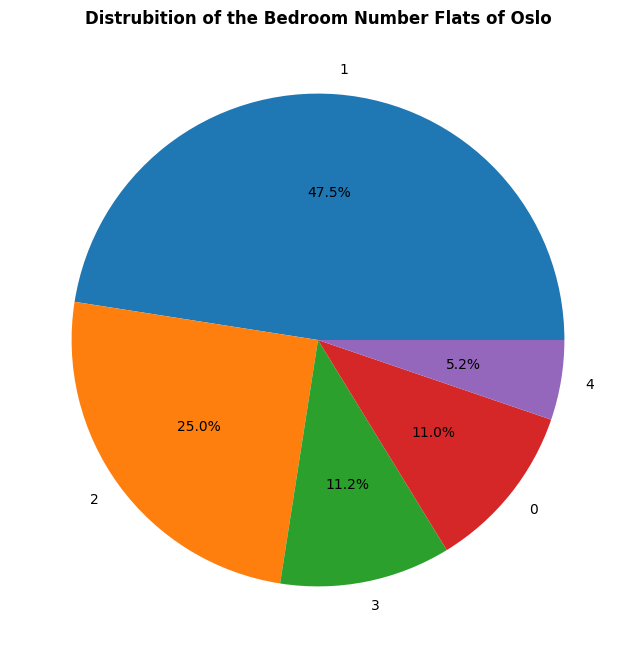

In [5]:
# get the value counts of the 'Bedroom' column
bed_room_counts = df['Bedroom'].value_counts()

# filter the value counts to include only values bigger than 1%
filtered_bedroom_counts = bed_room_counts[bed_room_counts/len(df) > 0.05]


# create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(filtered_bedroom_counts, labels=filtered_bedroom_counts.index, autopct='%1.1f%%')

# set the title of the chart
plt.title('Distrubition of the Bedroom Number Flats of Oslo', weight="bold")

# display the chart
plt.show();


In [20]:
df["Rent"].unique()

array([ 23500,  12000,   8950,  16500,  12500,  10000,  14500,  10500,
         7550,  11500,   8200,  13000,  24000,  13500,   7000,  22000,
         7500,   8500,   9000,   4900,  17000,  18000,   5600,   6800,
        12200,  16200,  20000,  15000,  16000,  13900,   6429,  20990,
        15500,  13800,   3000,  23000,   1200,  17500,   1600,   1500,
        35000,  19000,  18500,  13300,  13250,   9900,  22500,   7450,
        31300,   6500,  14000,  34000,  18400,  25000,   8150,  14900,
         6300,  75000,  27000,   8900,   9800,  15790,   9200,  24500,
        45000,  26000,  14750,   7425,   9250,  11000,   1400,  21900,
         7300,   6000,   1250,  27500,   7167,   8100,  21500,  13950,
         7825,  11900,  28000,  10300,  20900,  22900,  21400,  22600,
        15300,   7200,  21000,   6690,  32500,  15900,   3450,   7800,
        11200,  14800,  12900,  16250,   6225,  12800,   1800,  18900,
         2750,  19375,   5800,   8000,   8600,   2000,  29700,   5900,
      

In [15]:
df["Deposit"]=df["Deposit"].apply(lambda x: "48000" if "mnd" in x else x)
df["Deposit"]=df["Deposit"].apply(lambda x: "48000" if "husleie" in x else x)
df["Deposit"]=df["Deposit"].apply(lambda x: "48000" if "måneders" in x else x)
df["Deposit"]=df["Deposit"].apply(lambda x: "48000" if "Husleie" in x else x)
df["Deposit"]=df["Deposit"].apply(lambda x: "48000" if '3 Mnd/Garanti' in x else x)
df["Deposit"]=df["Deposit"].apply(lambda x: "48000" if 'månedsleie' in x else x)
df["Deposit"]=df["Deposit"].apply(lambda x: "48000" if 'Etter avtale' in x else x)


In [19]:
df["Deposit"]=df["Deposit"].apply(lambda x: "48000" if 'nan' in x else x)
df["Deposit"]=df["Deposit"].apply(lambda x: "48000" if '3 måneder/Garanti' in x else x)
df["Deposit"]=df["Deposit"].apply(lambda x: "48000" if '/ garanti' in x else x)

In [23]:
df["Deposit"]=df["Deposit"].apply(lambda x: "48000" if 'ja' in x else x)

In [21]:
df= df.loc[(df["Deposit"] >= 8000) & (df["Deposit"] <= 96000),:]

TypeError: '>=' not supported between instances of 'str' and 'int'

In [20]:
df["Deposit"].unique()

array(['48000', '36000', '26850', '43500', '37500', '30000', '10000',
       '34500', '500', '39000', '72000', '40500', '31500', '66000',
       '25500', '27000', '34000', '24400', '19000', '25000', '60000',
       '15000', '46500', '45000', '54000', '26000', '46000', '24000',
       '52500', '57000', '67500', '65000', '14500', '23000', '20000',
       '24450', '44000', '35600', '21000', '31000', '73500', '75000',
       '38000', '49500', '55500', '29750', '33000', '42000', '51000',
       '40000', '1', '22500', '32000', '82500', '16200', '35000', '64500',
       '70500', '81000', '102000', '84000', '29000', '11000', '50000',
       '52000', '47700', '48750', '11500', '44700', '56754', '16000',
       '18000', '28000', '17200', '29700', '41700', '22000', '63000',
       '17000', '24750', '28500', '35700', '34200', '50700', '16400',
       '120000', '44400', '58800', '25200', '45600', '78000', '45750',
       '53700', '28350', '41250', '12000', '69000', '29400', '19800',
       '70000',

In [6]:
df['Deposit'] = df['Deposit'].apply(lambda x: str(x).replace(",", ""))
df['Deposit'] = df['Deposit'].apply(lambda x: str(x).replace("–", ""))
df["Deposit"]=df["Deposit"].astype(int)

ValueError: invalid literal for int() with base 10: '3 mnd'

In [8]:
df['Rent'] = df['Rent'].apply(lambda x: str(x).replace(",", ""))
df['Rent'] = df['Rent'].apply(lambda x: str(x).replace("–", ""))

In [9]:
df["Rent"]=df["Rent"].apply(lambda x :12000 if x == 'nan' else x)
df["Rent"]=df["Rent"].astype(int)

In [10]:
df= df.loc[(df["Rent"] >= 8000) & (df["Rent"] <= 46000),:]

In [11]:
df["Rent"].mean()

15977.267625899281

In [13]:
### Rent price NOK to Euro ###
15977*0.087

1389.9989999999998

In [24]:
df["Deposit"]=df["Deposit"].astype(int)
df["Deposit"].mean()

42413.55203836931

In [26]:
### Deposit Price Nok to Euro ###
42413*0.087

3689.9309999999996

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 2549
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2085 non-null   int64  
 1   Location    2084 non-null   object 
 2   Flat Type   2084 non-null   object 
 3   Rent        2085 non-null   int32  
 4   Deposit     2085 non-null   int32  
 5   Bedroom     2085 non-null   int32  
 6   Floor       1727 non-null   float64
 7   Net Area    2084 non-null   object 
dtypes: float64(1), int32(3), int64(1), object(3)
memory usage: 122.2+ KB


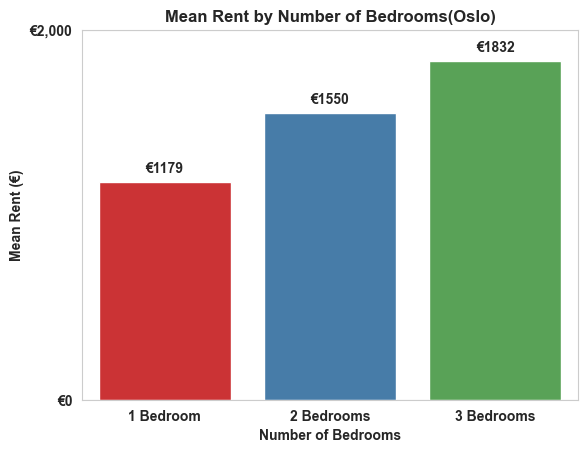

In [29]:
### Calculate mean rent for each group + add expenses ###
one_bed_mean_rent = df[df['Bedroom'] == 1]['Rent'].mean()*0.087
two_bed_mean_rent = df[df['Bedroom'] == 2]['Rent'].mean()*0.087
three_bed_mean_rent = df[df['Bedroom'] == 3]['Rent'].mean()*0.087

### Create a bar plot ###
sns.set_style("whitegrid")
ax = sns.barplot(x=['1 Bedroom', '2 Bedrooms','3 Bedrooms'], y=[one_bed_mean_rent, two_bed_mean_rent,three_bed_mean_rent], palette="Set1")

# Add labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height+50, '€{:.0f}'.format(height), ha="center", weight='bold')

# Format the x and y-axis tick labels
ax.set_xticklabels(['1 Bedroom', '2 Bedrooms','3 Bedrooms'], weight='bold')
ax.set_yticks([0, 2000])
ax.set_yticklabels(['€0', '€2,000'], weight='bold')

# Format the x and y-axis labels
ax.set_xlabel('Number of Bedrooms', weight='bold')
ax.set_ylabel('Mean Rent (€)', weight='bold')

# Set the plot title
ax.set_title('Mean Rent by Number of Bedrooms(Oslo)', weight='bold')

plt.show();